In [1]:
import numpy as np
import os
import dill as pickle
import matplotlib.pyplot as plt
import pandas as pd
import sys
import hardware_control.wx_programs as wx
import hardware_control.bnc as bnc
from classes.generator import *
from hardware_control.hardware_config import *
from experiment_configuration.values import *
from classes.qubit_class import *
import daq.daq_programs_homo as daq
import seaborn as sns
import standard_sequences.spectroscopy as spec
import analysis.plotting as plotting

In [2]:
q1 = Qubit(q1_dict, readout_dict)
q2 = Qubit(q2_dict, readout_dict)
readout = Readout(readout_dict)
print(f"{q1}\n{q2}")
bnc.set_bnc_output(
    readout.RO_LO, power_dBm=readout.RO_LO_pwr, bnc_addr=bnc_address["target_bnc_black"]
)
bnc.set_bnc_output(
    general_vals_dict["TWPA_freq"],
    power_dBm=general_vals_dict["TWPA_pwr"],
    bnc_addr=bnc_address["agilent_function_generator"],
)
bnc.set_bnc_output(
    general_vals_dict["qubit_bnc"], power_dBm=13, bnc_addr=bnc_address["target_bnc_6"]
)

Qubit(qubit_id=q1, RO_IF=None, ef_time=77, ro_amp=0.6, ge_ssm=-0.114, ge_time=66.83921813916868, ef_ssm=-0.1859, ro_freq=6.72742, qubit_thr=[-10000, -600], RO_LO=6.6247, ge_amp=0.5, RO_LO_pwr=16, IQ_angle=205, ROIF=0.10272000000000059, ro_dur=4000, ef_amp=1)
Qubit(qubit_id=q2, RO_IF=None, ef_time=None, ro_amp=0.4, ge_ssm=-0.154, ge_time=23.610582067254867, ef_ssm=-0.224, ro_freq=6.6556, qubit_thr=[-10000, 1900], RO_LO=6.6247, ge_amp=1, RO_LO_pwr=16, IQ_angle=85, ROIF=0.030899999999999928, ro_dur=4000, ef_amp=1)


writing to C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
writing ch1
writing ch2
writing ch3
writing ch4
loading C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
num_steps 101
loading ch1
loading ch2
loading ch3
loading ch4
0, No error
0, No error
0, No error
0, No error
0, No error
0, No error
Patterns: 101
Records per pattern: 500
Buffers per acquistion: 17
DAQ samples per pattern: 8192
0, No error
Capturing 17 buffers. Press <enter> to abort
Capture completed in 6.881158 sec
Captured 17 buffers (2.470514 buffers per sec)
Captured 52224 records (7589.420144 records per sec)
Transferred 855638016 bytes (124345059.638126 bytes per sec)


<Figure size 800x800 with 0 Axes>

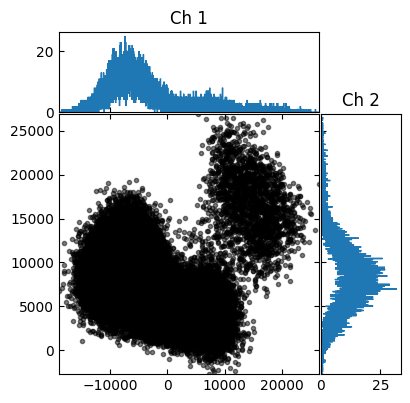

<Figure size 800x800 with 0 Axes>

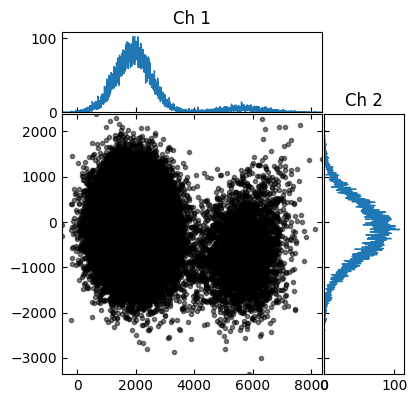

In [5]:
num_steps = 101
f1 = -0.3
f2 = -0.2

reps = 500
general_vals_dict["wx_amps"] = [1.0, 0.5, 0.5, 1]
spec.spectroscopy_ef(
    q1,
    q2,
    general_vals_dict,
    ssm_start=f1,
    ssm_stop=f2,
    spec_amp=0.2,
    sweep_time=200,
    verbose=False,
)
wx.wx_set_and_amplitude_and_offset(
    amp=general_vals_dict["wx_amps"], offset=general_vals_dict["wx_offs"]
)
# Acquire the raw IQ data
values = daq.run_daq_het_2q(
    q1, q2, num_patterns=num_steps, num_records_per_pattern=reps, verbose=True
)

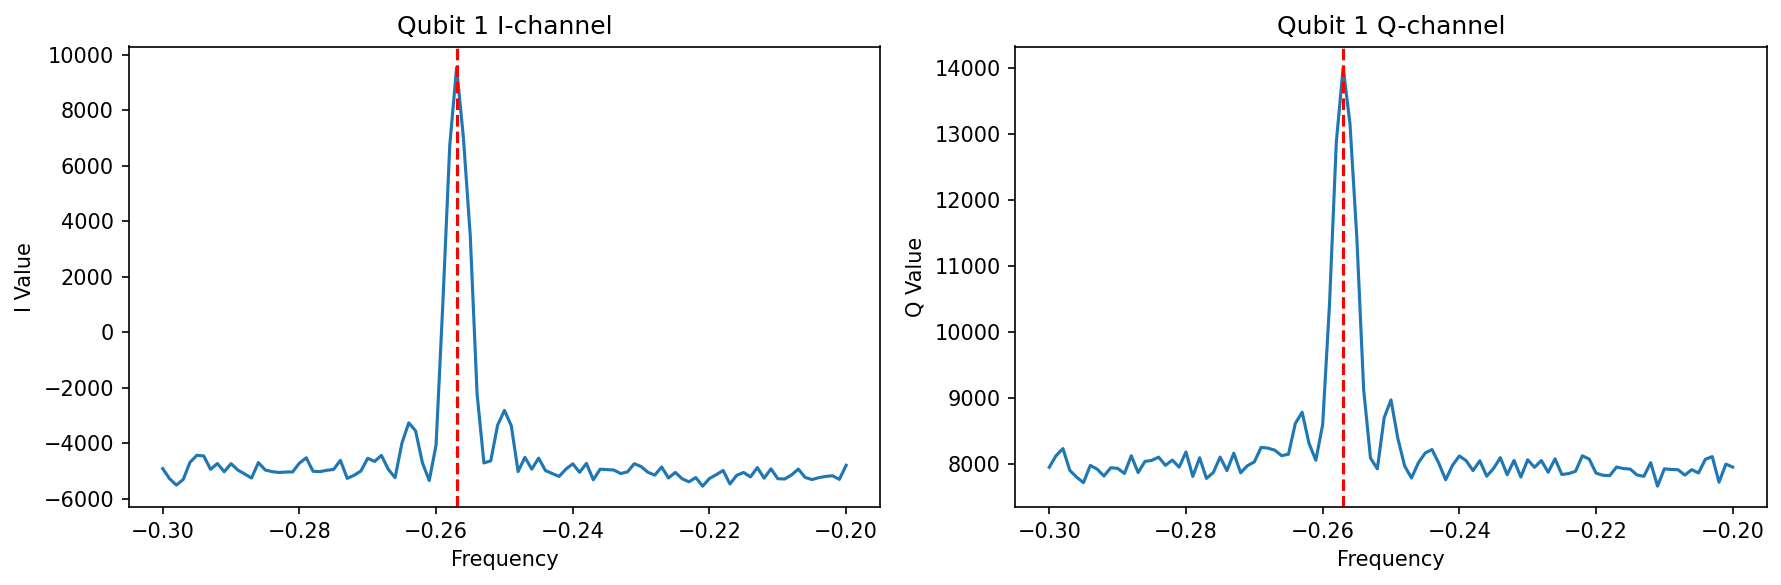

-0.257

In [6]:
freq_list = np.linspace(f1, f2, num_steps)
dat = plotting.get_IQ_averages(values)
freq = freq_list[np.argmax(dat["I1"])]
plotting.spectroscopy_plot(freq_list, values, [freq, freq], qubit_num=1)
freq